### Auto Arima

#### import libraries

In [24]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
import plotly.express as px

import pmdarima as pm


matplotlib.rcParams['figure.figsize'] = (10,8)
matplotlib.rcParams['axes.grid'] = False

In [2]:
#laod data 
df = pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/nyc_energy_consumption.csv')
df.head()

timeStamp  demand  precip   temp
0  2012-01-01 00:00:00  4937.5     0.0  46.13
1  2012-01-01 01:00:00  4752.1     0.0  45.89
2  2012-01-01 02:00:00  4542.6     0.0  45.04
3  2012-01-01 03:00:00  4357.7     0.0  45.03
4  2012-01-01 04:00:00  4275.5     0.0  42.61

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49205 entries, 0 to 49204
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timeStamp  49205 non-null  object 
 1   demand     49124 non-null  float64
 2   precip     48975 non-null  float64
 3   temp       49019 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1.5+ MB


In [4]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49205 entries, 0 to 49204
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timeStamp  49205 non-null  datetime64[ns]
 1   demand     49124 non-null  float64       
 2   precip     48975 non-null  float64       
 3   temp       49019 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.5 MB


In [5]:
#visualize data
fig = px.line(df, x='timeStamp',y='demand', title='NYC energy demand')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector =dict(
        buttons = list([
            dict(count=1, label='1y',step='year',stepmode='backward'),
            dict(count=2, label='3y',step='year',stepmode='backward'),
            dict(count=3, label='5y',step='year',stepmode='backward'),
            dict(step='all')
        ])
    )
)
fig.show()

In [6]:
ny_df = df.set_index('timeStamp')

array([<AxesSubplot:xlabel='timeStamp'>, <AxesSubplot:xlabel='timeStamp'>,
       <AxesSubplot:xlabel='timeStamp'>], dtype=object)

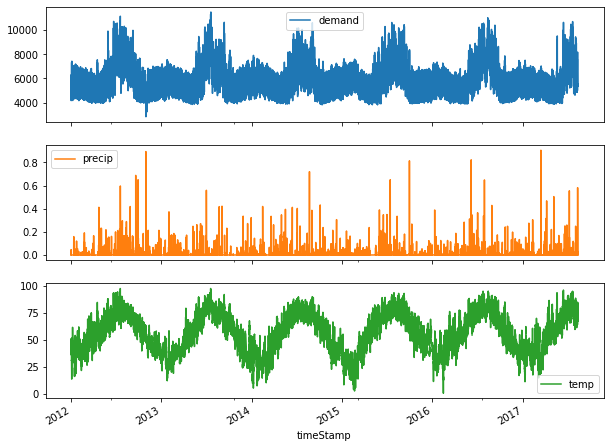

In [8]:
ny_df.plot(subplots=True)

In [9]:
df.shape

(49205, 4)

In [10]:
df.columns.tolist()

['timeStamp', 'demand', 'precip', 'temp']

In [11]:
df.isnull().sum()

timeStamp      0
demand        81
precip       230
temp         186
dtype: int64

In [13]:
df.nunique()

timeStamp    49205
demand       40972
precip        1004
temp          7580
dtype: int64

In [16]:
#it return only nan rows foe demand feature
df.query('demand != demand')

timeStamp  demand  precip   temp
49124 2012-03-11 02:00:00     NaN  0.0000  37.78
49125 2013-03-10 02:00:00     NaN  0.0000  38.18
49126 2014-03-09 02:00:00     NaN  0.0000  40.86
49127 2015-03-08 02:00:00     NaN  0.0000  36.96
49128 2015-03-11 11:00:00     NaN  0.0000  49.95
...                   ...     ...     ...    ...
49200 2017-08-12 02:00:00     NaN  0.0000  70.84
49201 2017-08-12 03:00:00     NaN  0.0000  70.57
49202 2017-08-12 04:00:00     NaN  0.0000  69.89
49203 2017-08-12 05:00:00     NaN  0.0000  68.59
49204 2017-08-12 06:00:00     NaN  0.0031  67.33

[81 rows x 4 columns]

In [17]:
df['demand'] = df['demand'].fillna(method='ffill')
df['temp'] = df['temp'].fillna(method='ffill')

In [18]:
df.isnull().sum()

timeStamp      0
demand         0
precip       230
temp           0
dtype: int64

array([<AxesSubplot:xlabel='timeStamp'>, <AxesSubplot:xlabel='timeStamp'>,
       <AxesSubplot:xlabel='timeStamp'>], dtype=object)

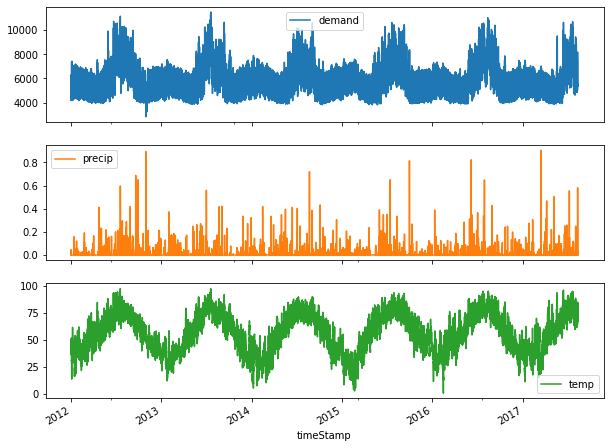

In [19]:
ny_df = df.set_index('timeStamp')
ny_df.plot(subplots=True)

In [20]:
ny_df.resample('M').mean()

demand    precip       temp
timeStamp                                   
2012-01-31  5757.495833  0.003116  37.174288
2012-02-29  5622.331609  0.001650  40.448046
2012-03-31  5479.919198  0.001179  49.607917
2012-04-30  5368.945833  0.003959  54.255903
2012-05-31  5867.896102  0.005064  64.188078
...                 ...       ...        ...
2017-04-30  5233.477382  0.002942  55.621764
2017-05-31  5421.773060  0.004031  61.115457
2017-06-30  6597.990346  0.003008  71.962625
2017-07-31  7306.861511  0.002272  76.380363
2017-08-31  6711.707542  0.008961  73.730258

[68 rows x 3 columns]

array([<AxesSubplot:xlabel='timeStamp'>, <AxesSubplot:xlabel='timeStamp'>,
       <AxesSubplot:xlabel='timeStamp'>], dtype=object)

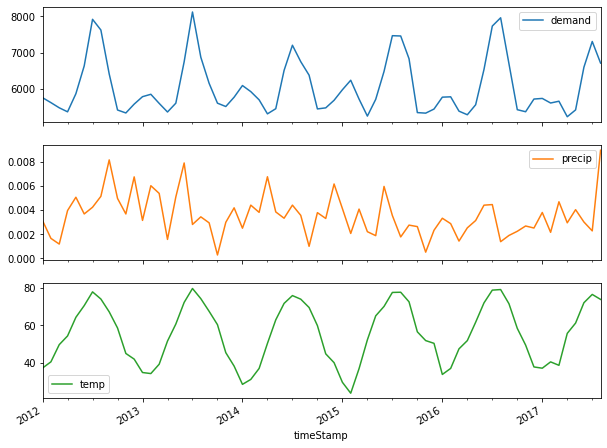

In [21]:
ny_df.resample('M').mean().plot(subplots=True)

In [23]:
ny_df_monthly = ny_df.resample('M').mean()

#### arima model

In [25]:
model = pm.auto_arima(ny_df_monthly['demand'],
                     m=12,
                     seasonal=True,
                     start_p=0,
                     start_q=0,
                     max_order=4,
                     test='adf',
                     error_action='ignore',
                     supress_warning=True,
                     stepwise=True,
                     trace = True
                     )

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=3.11 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1100.321, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1023.742, Time=1.43 sec


c:\users\romiyo\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1006: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.



 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.73 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=1380.758, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=1065.516, Time=0.03 sec


c:\users\romiyo\appdata\local\programs\python\python36\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=1022.324, Time=18.52 sec


c:\users\romiyo\appdata\local\programs\python\python36\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=30.02 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=nan sec
 ARIMA(0,0,0)(2,0,0)[12] intercept   : AIC=1097.636, Time=11.77 sec


c:\users\romiyo\appdata\local\programs\python\python36\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,0)(2,0,0)[12] intercept   : AIC=1015.709, Time=22.09 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=1014.059, Time=2.04 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=1021.211, Time=0.19 sec
 ARIMA(2,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=nan sec


c:\users\romiyo\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1006: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.



 ARIMA(2,0,0)(0,0,1)[12] intercept   : AIC=997.347, Time=1.34 sec


c:\users\romiyo\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



 ARIMA(2,0,0)(0,0,2)[12] intercept   : AIC=993.144, Time=21.15 sec


c:\users\romiyo\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



 ARIMA(2,0,0)(1,0,2)[12] intercept   : AIC=995.136, Time=12.53 sec


c:\users\romiyo\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

c:\users\romiyo\appdata\local\programs\python\python36\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(1,0,0)(0,0,2)[12] intercept   : AIC=inf, Time=12.95 sec


c:\users\romiyo\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

c:\users\romiyo\appdata\local\programs\python\python36\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,0)(0,0,2)[12] intercept   : AIC=995.447, Time=19.08 sec


c:\users\romiyo\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



 ARIMA(2,0,1)(0,0,2)[12] intercept   : AIC=994.749, Time=20.72 sec


c:\users\romiyo\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



 ARIMA(1,0,1)(0,0,2)[12] intercept   : AIC=1000.737, Time=11.82 sec


c:\users\romiyo\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

c:\users\romiyo\appdata\local\programs\python\python36\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,1)(0,0,2)[12] intercept   : AIC=998.766, Time=18.22 sec


c:\users\romiyo\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

c:\users\romiyo\appdata\local\programs\python\python36\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,0)(0,0,2)[12]             : AIC=inf, Time=7.91 sec

Best model:  ARIMA(2,0,0)(0,0,2)[12] intercept
Total fit time: 219.291 seconds


In [26]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                   68
Model:             SARIMAX(2, 0, 0)x(0, 0, [1, 2], 12)   Log Likelihood                -490.572
Date:                                 Tue, 01 Dec 2020   AIC                            993.144
Time:                                         02:27:44   BIC                           1006.461
Sample:                                              0   HQIC                           998.420
                                                  - 68                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3721.6223    792.259      4.697      0.000    2168.823    5274.422
ar.L1          0.8586      0.123      6.985      0.000       0.618       1.099
ar.L2         -0.4748      0.142     -3.352      0.001      -0.752      -0.197
ma.S.L12       0.8923      0.137      6.501      0.000       0.623       1.161
ma.S.L24       0.4571      0.206      2.222      0.026       0.054       0.860
sigma2      9.046e+04   1.58e+04      5.726      0.000    5.95e+04    1.21e+05
===================================================================================
Ljung-Box (Q):                       64.20   Jarque-Bera (JB):                 5.55
Prob(Q):                              0.01   Prob(JB):                         0.06
Heteroskedasticity (H):               0.78   Skew:                             0.52
Prob(H) (two-sided):                  0.55   Kurtosis:                         3.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [27]:
ny_df_monthly

demand    precip       temp
timeStamp                                   
2012-01-31  5757.495833  0.003116  37.174288
2012-02-29  5622.331609  0.001650  40.448046
2012-03-31  5479.919198  0.001179  49.607917
2012-04-30  5368.945833  0.003959  54.255903
2012-05-31  5867.896102  0.005064  64.188078
...                 ...       ...        ...
2017-04-30  5233.477382  0.002942  55.621764
2017-05-31  5421.773060  0.004031  61.115457
2017-06-30  6597.990346  0.003008  71.962625
2017-07-31  7306.861511  0.002272  76.380363
2017-08-31  6711.707542  0.008961  73.730258

[68 rows x 3 columns]

In [29]:
train = ny_df_monthly[(ny_df_monthly.index.get_level_values(0) >= '2012-01-31') &
                      (ny_df_monthly.index.get_level_values(0) <= '2017-04-30')]
test = ny_df_monthly[((ny_df_monthly.index.get_level_values(0) > '2017-04-30'))]

In [30]:
train.head()

demand    precip       temp
timeStamp                                   
2012-01-31  5757.495833  0.003116  37.174288
2012-02-29  5622.331609  0.001650  40.448046
2012-03-31  5479.919198  0.001179  49.607917
2012-04-30  5368.945833  0.003959  54.255903
2012-05-31  5867.896102  0.005064  64.188078

In [31]:
test.head()

demand    precip       temp
timeStamp                                   
2017-05-31  5421.773060  0.004031  61.115457
2017-06-30  6597.990346  0.003008  71.962625
2017-07-31  7306.861511  0.002272  76.380363
2017-08-31  6711.707542  0.008961  73.730258

In [32]:
print(train.shape)
print(test.shape)

(64, 3)
(4, 3)


In [33]:
model.fit(train['demand'])

c:\users\romiyo\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



ARIMA(order=(2, 0, 0), scoring_args={}, seasonal_order=(0, 0, 2, 12))

In [35]:
forecast = model.predict(n_periods=4, return_conf_int=True)
forecast

(array([5320.83272846, 6194.15056743, 7184.10816246, 7297.99964893]),
 array([[4724.37017002, 5917.29528691],
        [5391.43559207, 6996.86554279],
        [6358.61998886, 8009.59633607],
        [6467.7493871 , 8128.24991075]]))

In [37]:
forecast_df = pd.DataFrame(forecast[0], index = test.index, columns=['Prediction'])
forecast_df

Prediction
timeStamp              
2017-05-31  5320.832728
2017-06-30  6194.150567
2017-07-31  7184.108162
2017-08-31  7297.999649

<AxesSubplot:xlabel='timeStamp'>

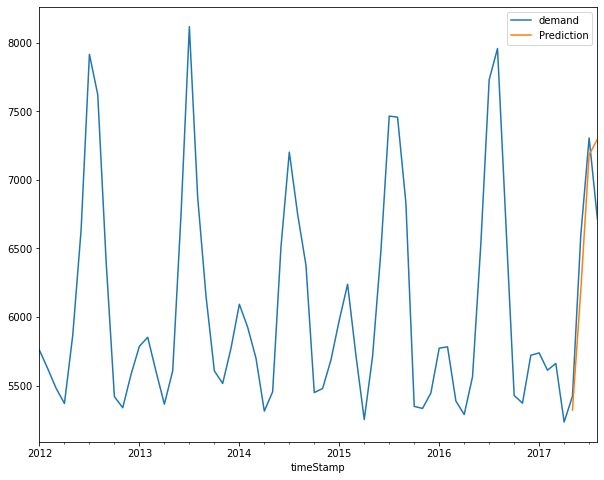

In [38]:
pd.concat([ny_df_monthly['demand'],forecast_df], axis=1).plot()

In [40]:
forecast1 = model.predict(n_periods=8, return_conf_int=True)
forecast1

(array([5320.83272846, 6194.15056743, 7184.10816246, 7297.99964893,
        6401.92728096, 5789.92419915, 5693.03961365, 5951.57308495]),
 array([[4724.37017002, 5917.29528691],
        [5391.43559207, 6996.86554279],
        [6358.61998886, 8009.59633607],
        [6467.7493871 , 8128.24991075],
        [5553.6473172 , 7250.20724472],
        [4934.10751405, 6645.74088425],
        [4837.08537204, 6548.99385526],
        [5094.94720869, 6808.1989612 ]]))

In [41]:
forecast_range = pd.date_range(start='2017-05-31', periods=8, freq='M')
forecast_range

DatetimeIndex(['2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31'],
              dtype='datetime64[ns]', freq='M')

In [43]:
forecast1_df = pd.DataFrame(forecast1[0], index= forecast_range, columns=['Prediction'])

<AxesSubplot:xlabel='timeStamp'>

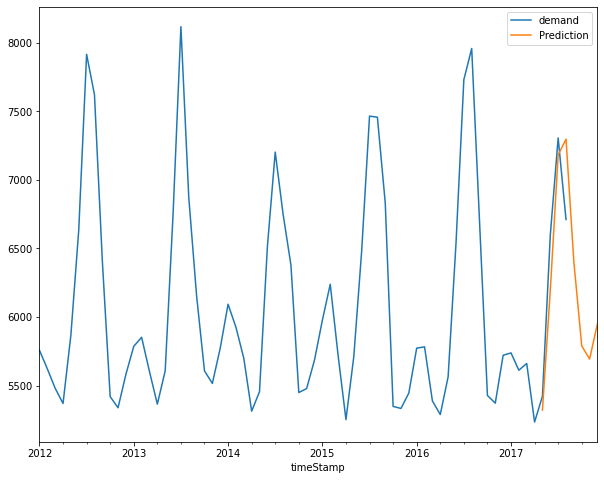

In [44]:
pd.concat([ny_df_monthly['demand'],forecast1_df], axis=1).plot()

In [45]:
#upper and lower bounding
lower = pd.Series(forecast1[1][:,0], index= forecast_range)
upper = pd.Series(forecast1[1][:,1], index= forecast_range)

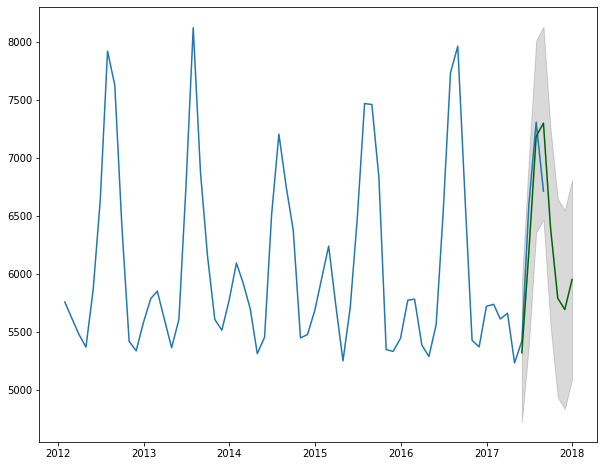

In [46]:
plt.plot(ny_df_monthly['demand'])
plt.plot(forecast1_df, color='darkgreen')
plt.fill_between(forecast_range,
                lower,
                upper,
                color='k',
                alpha=.15
                )

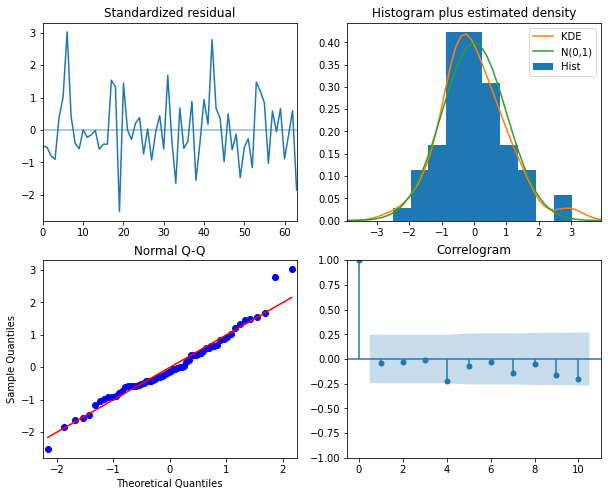

In [47]:
out = model.plot_diagnostics()